**<h1>CASO 4</h1>**

![especificaciones](huch.jpeg)


In [57]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

# Convierte irisdata.data en un DataFrame
dfiris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Ahora, dfiris es un DataFrame de pandas que contiene los datos de California Housing
dfiris.head()

df = dfiris

In [58]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Longitud del Sépalo (sepal length):**
Este atributo representa la longitud del sépalo de una flor de iris, medida en centímetros. El sépalo es la parte externa y protectora de la flor, que rodea los pétalos y protege el capullo floral.


**Ancho del Sépalo (sepal width):**
Este atributo representa el ancho del sépalo de una flor de iris, también medido en centímetros. Es la medida de la anchura del sépalo, tomada perpendicularmente a la longitud del sépalo.

**Longitud del Pétalo (petal length):**
Este atributo representa la longitud del pétalo de una flor de iris, medida en centímetros. El pétalo es la parte interna y generalmente coloreada de la flor, que a menudo es atractiva para los polinizadores.


**Ancho del Pétalo (petal width):**
Este atributo representa el ancho del pétalo de una flor de iris, también medido en centímetros. Es la medida de la anchura del pétalo, tomada perpendicularmente a la longitud del pétalo.

**Target es la especie de iris específica:**

Setosa: Representa la especie de iris Setosa.


Versicolor: Representa la especie de iris Versicolor.


Virginica: Representa la especie de iris Virginica.

0: Setosa
1: Versicolor
2: Virginica

Primero se cambian los espacios en los nombres de las variables para evitar confusiones

In [59]:
# Renombra las columnas con guiones bajos en lugar de espacios
#df.columns = df.columns.str.replace(' ', '_')

# Verifica los nombres de las columnas
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


En este ejercicio se trabajara con la variable target para predecir el tipo de iris o la categoria a la que pertenecen

In [60]:
# Vamos a crear los bins de datos para transformar nuestros valores continuos en categorías:
#df["cat"] = pd.qcut(df['target'], 3 , retbins=False, labels=[1,2,3])
df["sepal_width_iris"] = pd.qcut(df['sepal width (cm)'], 4, retbins=False, labels=[1, 2, 3, 4])
df["sepal_width_iris"]


0      4
1      2
2      3
3      3
4      4
      ..
145    2
146    1
147    2
148    4
149    2
Name: sepal_width_iris, Length: 150, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

En este punto se elimina de x las propias variables del target y la categorizada de la misma para que solo pertenezca a 'y' y las variables  que no generan valor dentro de la prediccion estando en 'x' solo se mantendra en 'x' las variables sepal length y sepal width

In [61]:
#import pandas as pd

# Suponiendo que tienes un DataFrame llamado df que contiene tus datos
# Intenta convertir los valores de la columna 'petal_length_(cm)' a numéricos
#try:
#    pd.to_numeric(df['petal_length_(cm)'])
#    print("La columna 'petal_length_(cm)' contiene solo valores numéricos.")
#except ValueError:
#    print("La columna 'petal_length_(cm)' contiene al menos un valor no numérico.")


In [62]:
#y = df['cat']
#X = df.drop(['cat','target' ,'petal_length_(cm)', 'petal_width_(cm)'], axis = 1)
y = df['sepal_width_iris']
#X = df['petal length (cm)']
X = df.drop(['sepal_width_iris','sepal width (cm)','petal width (cm)','sepal length (cm)' ], axis = 1)

Utilizaremos de nuevo el valor estándar de Scikit-Learn de 75% de datos de entrenamiento y 25% de datos de prueba. Esto significa que tendremos el mismo número de registros de entrenamiento y de prueba que en la regresión anterior.

In [63]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [64]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
X_train


array([[-1.39338902],
       [-1.33550342],
       [ 0.74837808],
       [ 0.4010645 ],
       [ 0.51683569],
       [-1.45127462],
       [-1.33550342],
       [-0.06202028],
       [ 0.74837808],
       [ 0.97992047],
       [ 0.3431789 ],
       [ 1.32723405],
       [ 0.2274077 ],
       [ 1.61666204],
       [ 0.4010645 ],
       [-1.39338902],
       [ 1.67454764],
       [ 0.16952211],
       [-1.39338902],
       [-1.45127462],
       [-1.10396103],
       [-0.17779148],
       [ 0.63260689],
       [-1.10396103],
       [-1.27761783],
       [-1.21973223],
       [ 0.2274077 ],
       [-1.33550342],
       [ 0.2274077 ],
       [ 1.67454764],
       [-1.39338902],
       [ 0.2852933 ],
       [ 0.69049248],
       [-1.39338902],
       [ 0.57472129],
       [ 0.74837808],
       [ 0.11163651],
       [ 0.4010645 ],
       [ 0.92203487],
       [ 0.11163651],
       [-1.21973223],
       [-0.29356267],
       [ 0.86414927],
       [-1.39338902],
       [-1.50916022],
       [-0

para el clasidicador se eligio manualmente puesto que es el que  brimda um accurracy mayor respecto a cualquiera

In [66]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

In [68]:
acc =  classifier.score(X_test, y_test)
print(acc) #0.8421052631578947

0.39473684210526316



El accuracy de 84% indica que los siete clasificadores utilizados para predecir las especies de iris tienen un rendimiento general sólido, capturando eficazmente las relaciones entre las características y las especies de iris. Aunque este resultado es positivo, siempre hay margen para la mejora mediante ajustes adicionales de hiperparámetros, selección de características o exploración de diferentes algoritmos de clasificación.

              precision    recall  f1-score   support

           1       0.40      0.55      0.46        11
           2       0.00      0.00      0.00         7
           3       0.20      0.10      0.13        10
           4       0.57      0.80      0.67        10

    accuracy                           0.39        38
   macro avg       0.29      0.36      0.32        38
weighted avg       0.32      0.39      0.34        38



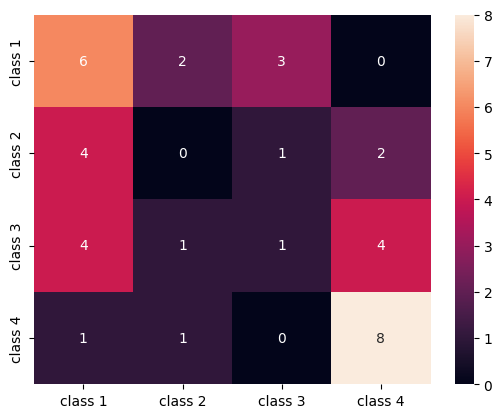

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

los resultados demuestran que el modelo con el accurracy del 84% es capaz de clasificar los 38 registros ,la clase 2 se confundio en tres casos con las clase tres  y asi mismo en viceversa,estos valores pueden deverse a la imposicion arbitraria de los k y de los bins pues debe hacerse una mejor evaluacion y mas exhaustiva de como seleccionar estos valores.

se puede deducir que la clase 2 y la tres se distinguen de manera dificil esto puede ser poir los bins elegidos que deberian ser mayores o menores o depender de otra variable


None 0.8133333333333334


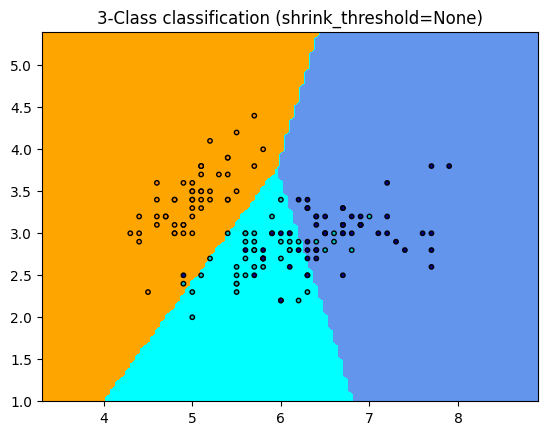

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

iris = load_iris()
X = iris.data
y = iris.target
# Suponiendo que X es un DataFrame de pandas
X_2d = X[:, [0, 1]]
y = iris.target

# Suponiendo que X es un DataFrame de pandas
#X_2d = X[['sepal_length_(cm)', 'petal_width_(cm)']].to_numpy()
#y = df["sepal_width_cat"]
# Ahora X_2d será un arreglo NumPy bidimensional con las dos variables seleccionadas
#print(X_2d)

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None]:
    # we create an instance of Nearest Centroid Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X_2d, y)
    y_pred = clf.predict(X_2d)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X_2d, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X_2d[:, 0],X_2d[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=10)
    plt.title("3-Class classification (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()


Este grafico representa la clasificacion dentro del target como variable  dependiente y teniendo como variables independientes la variable sepal length y sepal width 

In [71]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

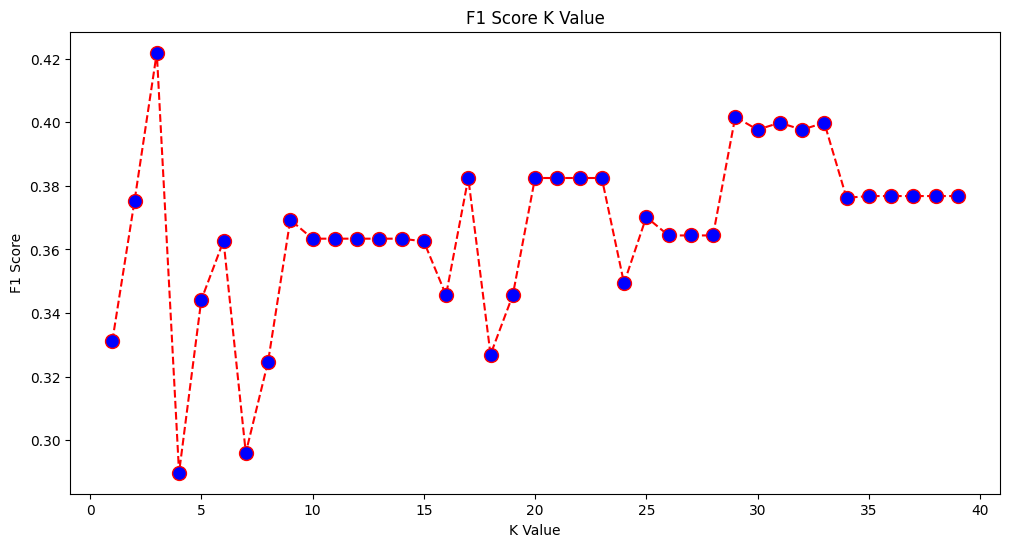

In [72]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

existe un valor maximo de f1 score gracias a los k entre 5 y 10 junto con los que se encuentran entre 30 y 40

In [73]:
classifier15 = KNeighborsClassifier(n_neighbors=8)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.44      0.36      0.40        11
           2       0.08      0.14      0.11         7
           3       0.00      0.00      0.00        10
           4       0.60      0.90      0.72        10

    accuracy                           0.37        38
   macro avg       0.28      0.35      0.31        38
weighted avg       0.30      0.37      0.32        38



se demuestra como al elegir los valores las categorias 2 y 3 mejoran sus porcentahes de acierto pero es cierto que  que existe un sobreajuste en la primer categoria quizas por los pocos datos 


In [74]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

In [75]:
distances[:3], distances.shape

(array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 (112, 5))

In [76]:
indexes[:3], indexes[:3].shape


(array([[ 96,  58,  63,   0,  67],
        [ 49,   6,   1,  62,  47],
        [ 54,   8,  48, 105,  35]]),
 (3, 5))

Text(0, 0.5, 'Mean Distances')

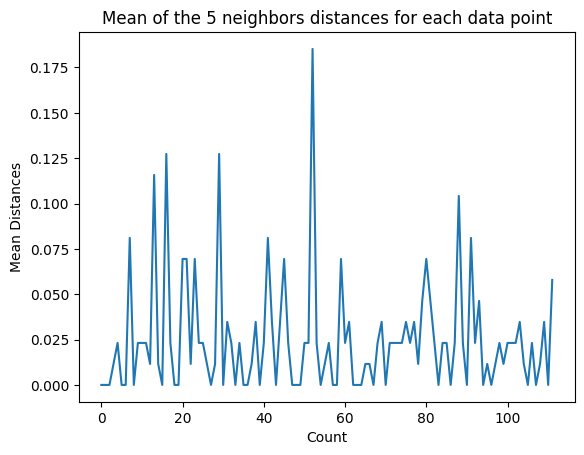

In [77]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

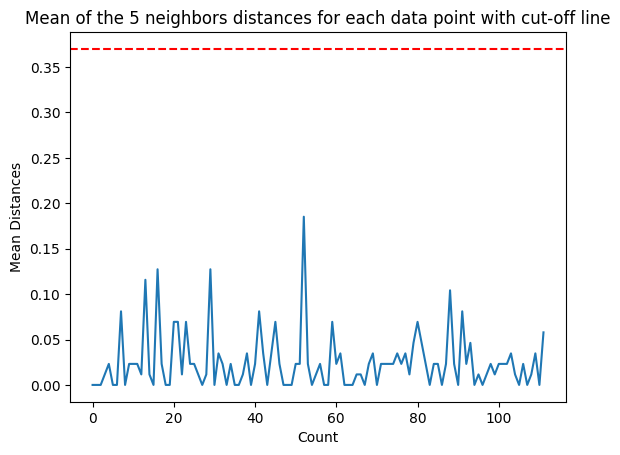

In [78]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 0.37, color = 'r', linestyle = '--')

Esta línea marca la distancia media por encima de la cual varían todos los valores. Esto significa que todos los puntos con una distancia media superior a 0.37 son nuestros valores atípicos. Podemos averiguar los índices de esos puntos utilizando np.where(). Este método dará como resultado Verdadero o Falso para cada índice con respecto a la condición de media superior a 3:

In [79]:
import numpy as np

# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 0.4)
outlier_index


(array([], dtype=int64),)

In [80]:
# Filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_width_iris


Es interesante como la mayor parte de los atipicos se encuentran en la categoria uno , siendo 8 puntos en total los que deberian examinarse mas a fondo , quizas tratarlos o eliminarlos de la base de datos.